In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy, scipy.ndimage

So = 917 # Insolation constant W.m−2
αb = 0.25 #(black)
αw = 0.75 #(white)
αg = 0.5 #(ground)
γ = 0.02#0.3 #Death rate
R = 0.2 #Insulation
L = 1.7 #Luminosity multiplier: [0.4-1.7]
σ = 5.670367e-8 #Stefan−Boltzmann constant W.m−2.K−4 (σ=5.67×10^−8Wm^−2K^−4)
aw = 0.3 #aw
ab = 0.6 #ab

scale=40
np.random.seed(10)
x, y = np.meshgrid(np.linspace(-1,1,scale), np.linspace(-1,1,scale))
A =np.random.choice([1.0, 0.0, -1.0], size=(scale,scale), p=[aw, 1-aw-ab, ab])

Mw=np.array(A>0)
Mb=np.array(A<0)
Mg=~Mw&~Mb

Aw=zero=np.zeros((scale,scale), dtype=float)
Ab=zero=np.zeros((scale,scale), dtype=float)
Aw[Mw]=A[Mw]
Ab[Mb]=-A[Mb]

# plot = plt.pcolormesh(x,y,Aw, cmap='magma')
# plot = plt.pcolormesh(x,y,Mg, cmap='Greys', vmin=-1, vmax=1)
# # plot = plt.pcolormesh(x,y,-Aw+Ab, cmap='Greys', vmin=-1, vmax=1)
# plt.colorbar(plot)
# plt.show()

def clip(Aw,Ab,scale=scale):
    # Aw.clip(0)
    Mw=np.array(Aw>0.01)
    Mb=np.array(Ab>0.01)
    Aw[~Mw]=0.0
    Ab[~Mb]=0.0
    return Aw, Ab, Mw, Mb

def seed(Aw,Mg, prob=0.01):
    sd =np.random.choice([0.0, 0.01], size=(scale,scale), p=[1-prob, prob])
    # Aw=np.zeros((scale,scale), dtype=float)
    Aw[Mg]=sd[Mg]
    Mg=(Mg&~(Aw>0))
    return Aw, Mg

def birth_rate(temp, temp_opt = 295.5):
    b= 1-0.003265*(temp_opt-temp)**2
    return b.clip(0)

def run(αw, αb, αg, γ, R, L, Aw, Ab, Mw, Mb):
    S0 = 917 # 917 Wm^−2
    σ = 5.67*10**-8
    for t in range(100):
        Mg=np.array((Aw<=0)&(Ab<=0))
        # if not Mw.any(): Aw,Mg=seed(Aw,Mg,0.01)
        # if not Mb.any(): Ab,Mg=seed(Ab,Mg,0.0111)
        Aw,Mg=seed(Aw,Mg,0.01)
        Ab,Mg=seed(Ab,Mg,0.0111)
        Ag = 1 -Aw -Ab
        αp = Aw*αw + Ab*αb + Ag*αg

        Tl = (L*(So/σ)*(1-αp))**(1/4)
        Tl=scipy.ndimage.gaussian_filter(Tl, sigma=2)
        Tw = (R*L*(So/σ)*(αp-αw)+Tl**4)**(1/4)
        Tb = (R*L*(So/σ)*(αp-αb)+Tl**4)**(1/4)

        Aw+=Aw*(Ag*birth_rate(Tw)-γ)
        Ab+=Ab*(Ag*birth_rate(Tb)-γ)
        Aw,Ab, Mw, Mb=clip(Aw,Ab)
    return Aw, Ab, Tl, αp, Mw, Mb

# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# Aw, Ab, Tl, αp, Mw, Mb = run(αw, αb, αg, γ, R, L, Aw, Ab, Mw, Mb)
Aw, Ab, Tl, αp, Mw, Mb = run(αw, αb, αg, γ, R, 0.4, Aw, Ab, Mw, Mb)


# lxx = np.linspace(0.4, 2.2, num=8)
# for lx in lxx:
#     Aw, Ab, Tl, αp, Mw, Mb = run(αw, αb, αg, γ, R, lx, Aw, Ab, Mw, Mb)
#     print("lx ",lx)
#     # plot = plt.pcolormesh(x,y,Aw-Ab, cmap='magma', vmin=-1, vmax=1)
#     plot = plt.pcolormesh(x,y,-Aw+Ab, cmap='Greys', vmin=-1, vmax=1)
#     plt.colorbar(plot)
#     plt.show()



0.4
0.45517241379310347
0.5103448275862069
0.5655172413793104
0.6206896551724138
0.6758620689655173
0.7310344827586208
0.7862068965517242
0.8413793103448277
0.896551724137931
0.9517241379310346
1.0068965517241382
1.0620689655172415
1.1172413793103448
1.1724137931034484
1.227586206896552
1.2827586206896553
1.3379310344827586
1.3931034482758622
1.4482758620689657
1.5034482758620693
1.5586206896551724
1.613793103448276
1.6689655172413795
1.724137931034483
1.7793103448275862
1.8344827586206898
1.8896551724137933
1.9448275862068969
2.0
2.0
1.9448275862068969
1.8896551724137933
1.8344827586206898
1.7793103448275862
1.724137931034483
1.6689655172413795
1.613793103448276
1.5586206896551724
1.5034482758620693
1.4482758620689657
1.3931034482758622
1.3379310344827586
1.2827586206896553
1.227586206896552
1.1724137931034484
1.1172413793103448
1.0620689655172415
1.0068965517241382
0.9517241379310346
0.896551724137931
0.8413793103448277
0.7862068965517242
0.7310344827586208
0.6758620689655173
0.62068

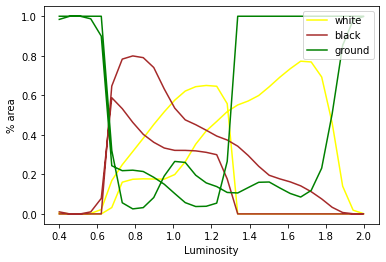

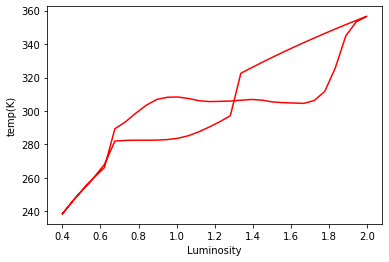

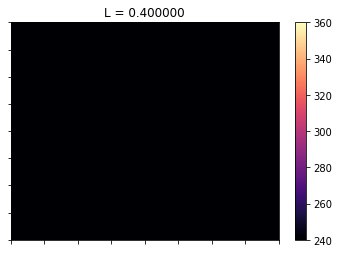

In [ ]:
lum = np.linspace(0.4, 2.0, num=30)
lum=np.append(lum,lum[::-1])
np.random.seed(10)

frame=[]
awbp=[]
tt=[]
wbt=[]
for L in lum:
    Aw, Ab, Tl, αp, Mw, Mb = run(αw, αb, αg, γ, R, L, Aw, Ab, Mw, Mb)
    # frame.append(Aw.copy())
    frame.append(Tl.copy())
    wbt.append([Aw.copy(), Ab.copy(), Tl.copy()])
    print(L)
    # plot = plt.pcolormesh(x,y,Aw, cmap='gray', vmin=0, vmax=1)
    # plt.colorbar(plot)
    # plt.show()

    one=np.ones((scale,scale), dtype=float)
    zero=np.zeros((scale,scale), dtype=float)
    # zero[Aw>0]=one[Aw>0]
    # zero[Mw]=one[Mw]
    zero[Mb]=one[Mb]
    # frame.append(zero)

    saw=Aw.sum()/scale**2
    sab=Ab.sum()/scale**2
    # saw=Mw.sum()
    # sab=Mb.sum()
    awbp.append([saw,sab,1-saw-sab])
    tl=Tl.sum()/scale**2
    tt.append(tl)
    # print(aw,ab,tl)


wbt=np.array(wbt)
awbp=np.array(awbp)
tt=np.array(tt)

import matplotlib.pyplot as plt
plt.plot(lum, awbp[:,0], color = 'yellow',label="white")
plt.plot(lum, awbp[:,1], color = 'brown',label="black")
plt.plot(lum, awbp[:,2], color = 'green',label="ground")
plt.legend(loc="upper right")
plt.xlabel('Luminosity')
plt.ylabel('% area')
plt.show()
plt.plot(lum, tt, color = 'red')
plt.xlabel('Luminosity')
plt.ylabel('temp(K)')
plt.show()

x, y = np.meshgrid(np.linspace(-1,1,scale), np.linspace(-1,1,scale))
iter=lum.shape[0]
frame=np.array(frame)


fig, ax = plt.subplots()
# mesh = ax.pcolormesh(x,y,frame[0, :, :], cmap='cividis', vmin=0, vmax=1)
# mesh = ax.pcolormesh(x,y,frame[0, :, :], cmap='magma', vmin=0, vmax=1)
mesh = ax.pcolormesh(x,y,frame[0, :, :], cmap='magma', vmin=240, vmax=360)
fig.colorbar(mesh)
title = ax.set_title('')
# ax.set_xlabel('Time')
# ax.set_ylabel('Magnitude')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

def animate(i):
    mesh.set_array(frame[i, :-1, :-1].ravel()) #https://stackoverflow.com/questions/29009743/using-set-array-with-pyplot-pcolormesh-ruins-figure
    title.set_text('L = {0:2f}'.format(lum[i]))
    return mesh

from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, animate, interval=400, frames=iter, repeat=False)
from IPython.display import HTML
HTML(anim.to_html5_video())



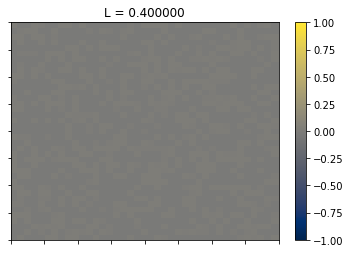

In [ ]:


# toplot=wbt[:,2,:,:]
toplot=wbt[:,0,:,:]-wbt[:,1,:,:]

fig, ax = plt.subplots()
mesh = ax.pcolormesh(x,y,toplot[0, :, :], cmap='cividis', vmin=-1, vmax=1)
# mesh = ax.pcolormesh(x,y,toplot[0, :, :], cmap='magma', vmin=0, vmax=1)
# mesh = ax.pcolormesh(x,y,toplot[0, :, :], cmap='magma', vmin=240, vmax=360)
fig.colorbar(mesh)
title = ax.set_title('')
# ax.set_xlabel('Time')
# ax.set_ylabel('Magnitude')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])

def animate(i):
    mesh.set_array(toplot[i, :-1, :-1].ravel()) #https://stackoverflow.com/questions/29009743/using-set-array-with-pyplot-pcolormesh-ruins-figure
    title.set_text('L = {0:2f}'.format(lum[i]))
    return mesh

from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, animate, interval=100, frames=iter, repeat=False)
from IPython.display import HTML
HTML(anim.to_html5_video())

